In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from datetime import datetime
import matplotlib.pyplot as plt
import os
# tf.compat.v1.disable_eager_execution()

# | CONSTANTS
EPOCHS = 2
TENSORBOARD = False
CHECKPOINTS = False

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Reserve 10,000 samples for validation
val_images = train_images[-10000:]
val_labels = train_labels[-10000:]
train_images = train_images[:-10000]
train_labels = train_labels[:-10000]

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

plt.imshow(train_images[0][:,:,0], cmap=plt.get_cmap("gray"))

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [3]:
# | create directories for tensorboard log_dir and model checkpoints
# | create directories for tensorboard log_dir and model checkpoints
ts = str(int(datetime.now().timestamp()))
callbacks = []
if TENSORBOARD:
  # | start tensorboard with > tensorboard --logdir=./log
  log_dir = './log/' + ts
  if not os.path.exists(log_dir):
      os.makedirs(log_dir)
  tb_callback = tf.keras.callbacks.TensorBoard(log_dir='.', update_freq='epoch')
  callbacks.append(tb_callback)

      
if CHECKPOINTS:
  checkpoint_dir = './checkpoints/' + ts
  if not os.path.exists(checkpoint_dir):
      os.makedirs(checkpoint_dir)
  checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_dir + '/weights.{epoch:02d}-{val_loss:.2f}.h5')
  callbacks.append(checkpoint_callback)

# | Compile the model
optimizer = 'adam'
# optimizer = tf.keras.optimizers.SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# | Training
history = model.fit(train_images, train_labels, 
              epochs=EPOCHS,
              validation_data=(val_images, val_labels),
              callbacks=callbacks)

Train on 50000 samples, validate on 10000 samples
Epoch 1/2
50000/50000 [==============================] - 27s 539us/sample - loss: 0.1740 - accuracy: 0.9453 - val_loss: 11.4403 - val_accuracy: 0.9833
Epoch 2/2
50000/50000 [==============================] - 26s 529us/sample - loss: 0.0541 - accuracy: 0.9831 - val_loss: 9.7287 - val_accuracy: 0.9862


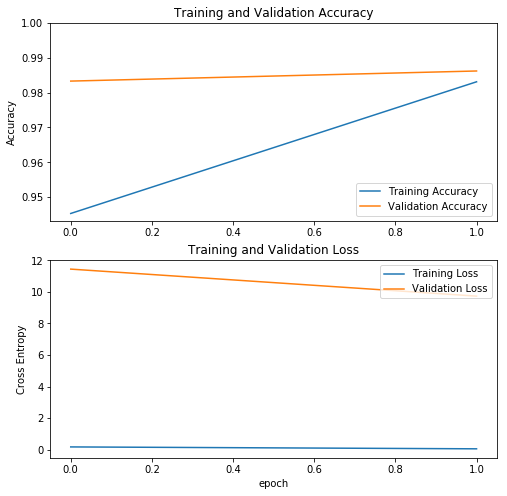

In [6]:
# test_loss, test_acc = model.evaluate(test_images, test_labels)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()